# analysis of DNA-MERFISH for CTP11

by Pu Zheng

2021.11.10

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_5\20211108-P_brain_CTP11-1000_DNA_only



# Load basic functions

In [2]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

34660


# 0. fov parameters

In [3]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20211108-P_brain_CTP11-1000_DNA_only',
             'save_folder':r'\\franklin\SSD_01\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_not_denoise',
             'experiment_type': 'DNA',
             'num_threads': 15,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor',
             'shared_parameters':{
                     'single_im_size':[60,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':True,
                     'min_num_seeds':500,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False
                 }, 
             }


In [7]:
#_fov_id = 5
_overwrite = False


#sel_fov_ids = np.concatenate([np.arange(0,5), np.arange(15,26)])
sel_fov_ids = np.arange(26,29)
print(sel_fov_ids)


for _fov_id in sel_fov_ids:
    # create fov class
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True,
                                              )
    
    # 2. Process image into candidate spots
    fov.parallel=True
    fov.combo_ref_id = 0

    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=False, 
                                _fit_spots=True,
                                _overwrite_drift=_overwrite, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    
    fov._load_dapi_image()

[26 27 28]
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 53
- Number of field of views: 60
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20211108-P_brain_CTP11-1000_DNA_only\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C50', 'H26C26', 'H27C27', 'H28C28', 'H29C29', 'H30C30', 'H31C31', 'H32C32', 'H33C33', 'H34C34', 'H35C35', 'H36C36', 'H37C37', 'H38C38', 'H39C39', 'H40C40', 'H41C41', 'H42C42', 'H43C43', 'H44C44', 'H45C45', 'H46C46', 'H47C47', 'H48C48', 'H49C49', 'H50P1', 'H51C38_c74', 'H52C38_c75'])
- 53 folders are found according to color-usage annotation.
+ loading fov_info from file: \\franklin\SSD_01\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_not_denoise\Conv_zscan

-- saving 750_chromatic profile to save_file: \\franklin\SSD_01\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_not_denoise\Conv_zscan_27.hdf5.
-- saving 647_chromatic profile to save_file: \\franklin\SSD_01\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_not_denoise\Conv_zscan_27.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: \\franklin\SSD_01\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_not_denoise\Conv_zscan_27.hdf5.
-- 647_chromatic_constants profile already exist in save_file: \\franklin\SSD_01\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_not_denoise\Conv_zscan_27.hdf5, skip.
-- saving 750_647_bleed profile to save_file: \\franklin\SSD_01\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_not_denoise\Conv_zscan_27.hdf5.
dict_keys(['combo', 'protein'])
save type: combo"
-- saving combo to file: \\franklin\SSD_01\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_not_denoise\Conv_zscan_27.hdf5
--- combo attributes updated:[

-- saving 750_chromatic profile to save_file: \\franklin\SSD_01\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_not_denoise\Conv_zscan_28.hdf5.
-- saving 647_chromatic profile to save_file: \\franklin\SSD_01\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_not_denoise\Conv_zscan_28.hdf5.
-- saving 750_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: \\franklin\SSD_01\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_not_denoise\Conv_zscan_28.hdf5.
-- 647_chromatic_constants profile already exist in save_file: \\franklin\SSD_01\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_not_denoise\Conv_zscan_28.hdf5, skip.
-- saving 750_647_bleed profile to save_file: \\franklin\SSD_01\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_not_denoise\Conv_zscan_28.hdf5.
dict_keys(['combo', 'protein'])
save type: combo"
-- saving combo to file: \\franklin\SSD_01\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_not_denoise\Conv_zscan_28.hdf5
--- combo attributes updated:[

In [4]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _fov_name = _f.attrs['fov_name']
    
    _grp = _f['combo']
    combo_ims = _grp['ims'][31:33]

<IPython.core.display.Javascript object>


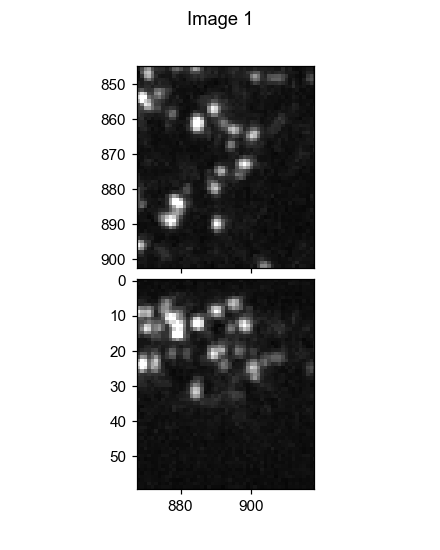

In [5]:
visual_tools.imshow_mark_3d_v2(combo_ims)

## check drifts

In [ ]:
sel_bits = [9,45,66]
bead_ims = fov._load_bead_ims_for_bits(sel_bits, 'combo')

<IPython.core.display.Javascript object>


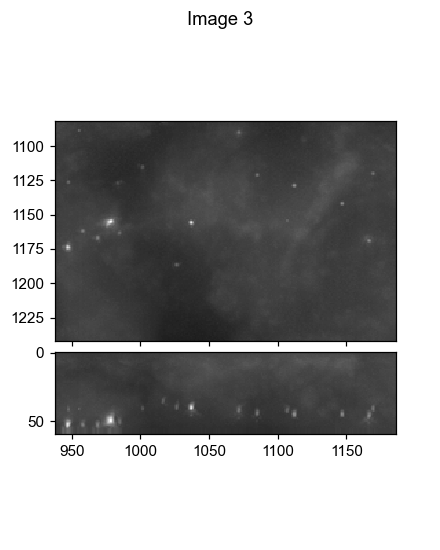

In [6]:
visual_tools.imshow_mark_3d_v2(bead_ims)

# Quality check for decoder

In [11]:
fov._load_from_file('combo')

+ loading combo from file: H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Conv_zscan_05.hdf5


In [58]:
from ImageAnalysis3.classes.preprocess import Spots3D, SpotTuple

In [59]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    #combo_ims = _grp['ims'][:]
    combo_ids = _grp['ids'][:]
    combo_channels = _grp['channels'][:]
    sel_bit_inds = np.array([np.where(combo_ids==_b)[0][0] for _b in np.array(sel_bits)])
    #sel_combo_ims = _grp['ims'][sel_bit_inds]
    
    raw_combo_spots_list = [Spots3D(_spots[_spots[:,0]>0], bits=_id, pixel_sizes=fov_param['shared_parameters']['distance_zxy']) 
                            for _id, _spots in zip(combo_ids, _grp['raw_spots'][:])]

In [96]:
# load cand_spots for this FOV
from ImageAnalysis3.classes import decode
cand_spots_folder = os.path.join(fov.save_folder, 'CandSpots')
cand_spots_filenames =  [os.path.join(cand_spots_folder, _fl) for _fl in os.listdir(cand_spots_folder) 
    if fov.fov_name.split(os.extsep)[0] in _fl and 'CandSpots.pkl' in _fl]

In [105]:
decoder_filenames[0]

'H:\\Pu_Temp\\20211108-P_brain_CTP11-1000_DNA_only\\Decoder\\Conv_zscan_05_Cell-100_Decoder.pkl'

In [29]:
# load decoder for this FOV
from ImageAnalysis3.classes import decode
decode_folder = os.path.join(fov.save_folder, 'Decoder')
decoder_filenames =  [os.path.join(decode_folder, _fl) for _fl in os.listdir(decode_folder) 
    if fov.fov_name.split(os.extsep)[0] in _fl and 'Decoder.pkl' in _fl]

In [100]:
decoders = [pickle.load(open(_fl, 'rb')) for _fl in decoder_filenames]

In [101]:
len(decoders)

117

In [102]:
sel_region_id = 31

In [110]:
all_sel_pairs = []
all_sel_groups = []
for _decoder in decoders:
    if not hasattr(_decoder, 'cand_pair_list'):
        continue
    else:
        _pair_list = getattr(_decoder, 'cand_pair_list')
        _spot_groups = getattr(_decoder, 'spot_groups')
        #sel_region_id = 418
        sel_pairs = [_p for _p in _pair_list if _p.tuple_id == sel_region_id]
        sel_groups = [_g for _g in _spot_groups if _g.tuple_id == sel_region_id]
        print(len(sel_pairs), len(sel_groups))
        break
        # append
        all_sel_pairs.extend(sel_pairs)
        all_sel_groups.extend(sel_groups)

3 1


In [120]:
lengths = [len(_g.spots) for _g in _spot_groups]

<IPython.core.display.Javascript object>


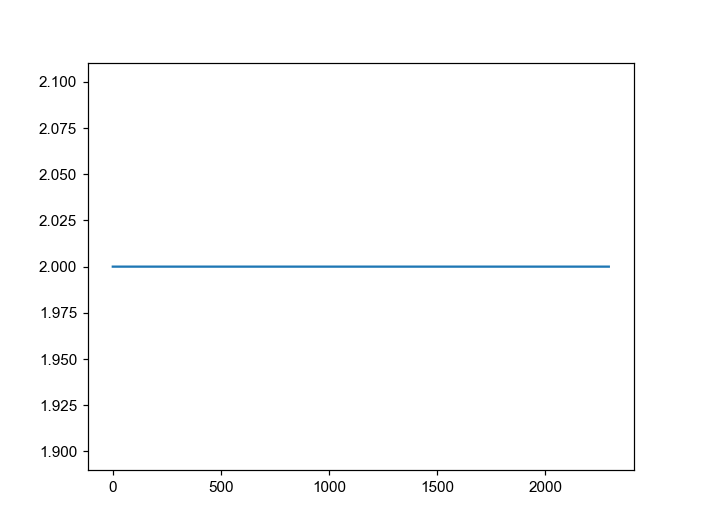

In [121]:
plt.figure()
plt.plot(lengths)

In [107]:
pair_spots_dict = {_b:[] for _b in sel_bits}

for _p in all_sel_pairs:
    for _spot, _bit in zip(_p.spots, _p.bits):
        _ibit = list(combo_ids).index(_bit)
        # find matching raw spots
        _raw_spot_ind = np.where(np.linalg.norm(raw_combo_spots_list[_ibit][:,4:] - _spot[4:], axis=1)<1e-5)[0]
        _raw_spot = raw_combo_spots_list[_ibit][_raw_spot_ind]
        pair_spots_dict[_bit].append(_raw_spot[0])

pair_spots_dict = {_b:Spots3D(_spots, bits=_b) for _b,_spots in pair_spots_dict.items()}

        
group_spots_dict = {_b:[] for _b in sel_bits}

for _p in all_sel_groups:
    for _spot, _bit in zip(_p.spots, _p.bits):
        _ibit = list(combo_ids).index(_bit)
        # find matching raw spots
        _raw_spot_ind = np.where(np.linalg.norm(raw_combo_spots_list[_ibit][:,4:] - _spot[4:], axis=1)<1e-5)[0]
        _raw_spot = raw_combo_spots_list[_ibit][_raw_spot_ind]
        group_spots_dict[_bit].append(_raw_spot[0])

group_spots_dict = {_b:Spots3D(_spots, bits=_b) for _b,_spots in group_spots_dict.items()}

In [108]:
spots_imshow_dict = {'coords':[],
                     'class_ids':[],
                    }


for _i, (_bit,_spots) in enumerate(pair_spots_dict.items()):
    
    #print(len(_spots))
    spots_imshow_dict['coords'].extend(list(np.fliplr(_spots.to_coords())))
    spots_imshow_dict['class_ids'].extend(list(_i*np.ones(len(_spots),dtype=np.int32)))


visual_tools.imshow_mark_3d_v2(sel_combo_ims, given_dic=spots_imshow_dict, image_names=sel_bits)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


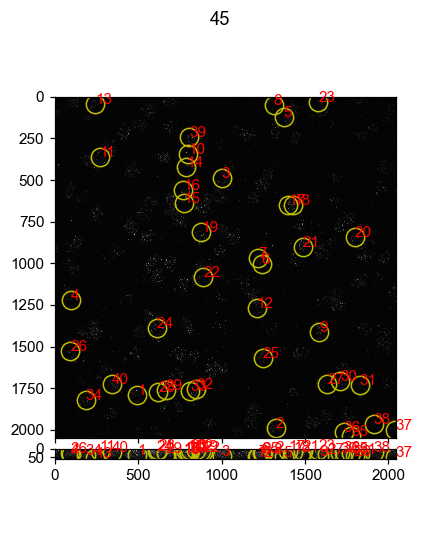

In [109]:
spots_imshow_dict = {'coords':[],
                     'class_ids':[],
                    }


for _i, (_bit,_spots) in enumerate(group_spots_dict.items()):
    
    #print(len(_spots))
    spots_imshow_dict['coords'].extend(list(np.fliplr(_spots.to_coords())))
    spots_imshow_dict['class_ids'].extend(list(_i*np.ones(len(_spots),dtype=np.int32)))


visual_tools.imshow_mark_3d_v2(sel_combo_ims, given_dic=spots_imshow_dict, image_names=sel_bits)


In [80]:
# test procedure
reload(decode)

<module 'ImageAnalysis3.classes.decode' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes\\decode.py'>

In [90]:
reload(decode)
save_folder = r'\\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only'

combo_ids = np.load(os.path.join(save_folder, 'combo_ids.npy'))
combo_channels = np.load(os.path.join(save_folder, 'combo_channels.npy'))
id_2_channel = {_id:_ch for _id,_ch in zip(combo_ids, combo_channels)}
pair_search_radius = 250
pixel_sizes = [250,108,108]

import pandas as pd
codebook_filename = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\Summary_tables\CTP11-mouse-genome-1000_codebook.csv'
#
codebook_df = pd.read_csv(codebook_filename, header=0)

In [98]:
decode_args = [(_fl, codebook_df, _fl.replace('CandSpots', 'Decoder'), 
                True, True, id_2_channel,
                pixel_sizes, 2, 0.5, 
                pair_search_radius, -1, 1, 5, 0, -25, False, True) for _fl in cand_spots_filenames
               #if not os.path.exists(_fl.replace('CandSpots', 'Decoder'))
               ]

- 6555 pairs kept given search radius 250 nm.
- search spot_groups given search radius 250 nm, keep_pairs=True


100%|████████████████████████████████████████████████████████████████████████| 6555/6555 [00:00<00:00, 86184.60it/s]


- 2365 spot_groups detected
- split found tuples into chromosomes. 
- generate randomized spot pairs 
- generate chr_2_kdtree. 
-- seeding chr:1 with 77 regions with 214 spot_groups
- diff in iter-0: 0.5748
- diff in iter-1: 0.0514
- diff in iter-2: 0.0187
- diff in iter-3: 0.0000
-- seeding chr:10 with 51 regions with 93 spot_groups
- diff in iter-0: 0.5914
- diff in iter-1: 0.0645
- diff in iter-2: 0.0000
-- seeding chr:11 with 48 regions with 137 spot_groups
- diff in iter-0: 0.5255
- diff in iter-1: 0.1022
- diff in iter-2: 0.0365
- diff in iter-3: 0.0146
- diff in iter-4: 0.0146
- diff in iter-5: 0.0000
-- seeding chr:12 with 43 regions with 109 spot_groups
- diff in iter-0: 0.4862
- diff in iter-1: 0.0275
- diff in iter-2: 0.0367
- diff in iter-3: 0.0092
- diff in iter-4: 0.0000
-- seeding chr:13 with 45 regions with 106 spot_groups
- diff in iter-0: 0.4340
- diff in iter-1: 0.0377
- diff in iter-2: 0.0000
-- seeding chr:14 with 42 regions with 138 spot_groups
- diff in iter-0: 0

<IPython.core.display.Javascript object>


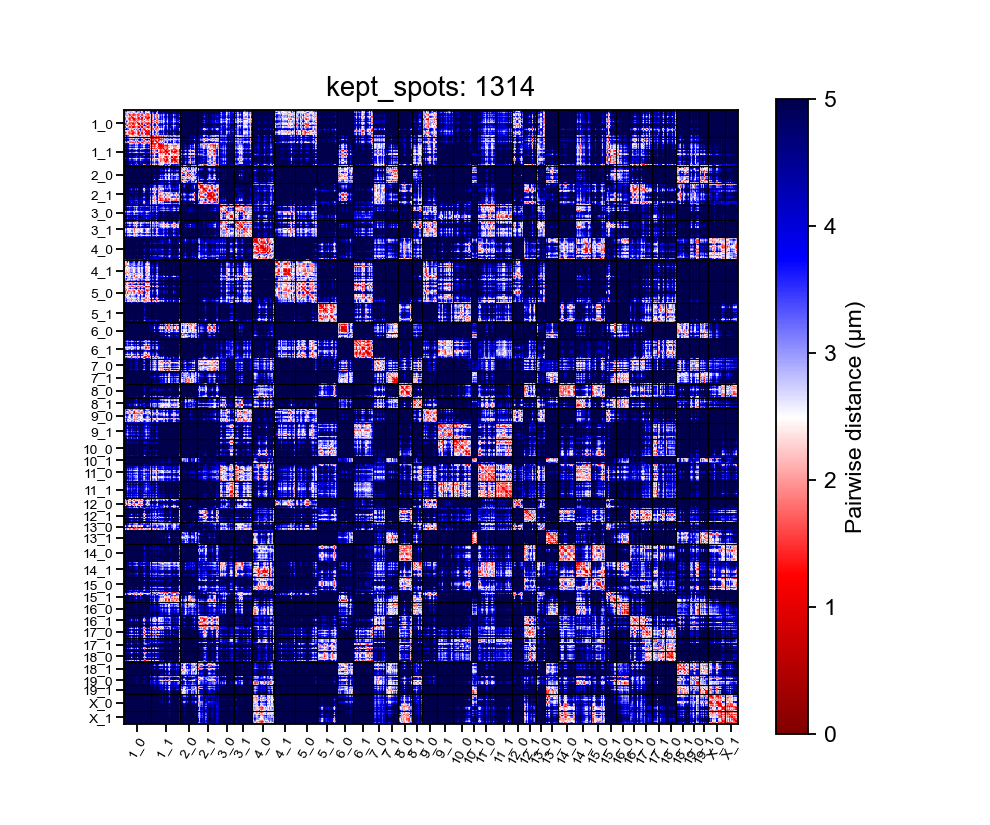

- Saving decoder into file: H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Decoder\Conv_zscan_05_Cell-10_Decoder.pkl


In [99]:
decode.batch_decode_DNA(*decode_args[10])

In [ ]:
def select_spot_tuples(self, max_usage=1, keep_pairs=True,
    search_th=default_search_th, eps=default_search_eps, weights=np.ones(5),
    overwrite=False):
    """Function to select spot tuples given spot_pairs found previously"""
    # initialize _spot_usage and tuples
    _spot_usage = np.zeros(len(self.cand_spots))
    # check spot_groups
    if hasattr(self, 'spot_groups') and not overwrite:
        for _g in self.spot_groups:
            _spot_usage[_g.spots_inds] += 1
        if self.verbose:
            print(f"- directly return {len(self.spot_groups)} spot_groups.")
        return self.spot_groups, _spot_usage
    # initlaize otherwise
    else:
        if self.verbose:
            print(f"- search spot_groups given search radius {search_th} nm, keep_pairs={keep_pairs}")
        self.spot_groups = [] 

    # decide whether generate pair_ind_list
    if not hasattr(self, 'pair_inds_list'):
        self.find_spot_pairs_in_radius(search_th=search_th, eps=eps)
    else:
        self.search_th = search_th
        self.search_eps = eps

    # create pair_list
    _pair_list = self.create_tuples_from_inds(self.cand_spots, self.pair_inds_list, self.valid_bit_pair_2_region)
    if len(_pair_list) == 0:
        return 
    else:
        self.cand_pair_list = _pair_list
    # generate scores for pair_list
    _pair_ref_metrics = generate_score_metrics(self.cand_pair_list,)
    _pair_ref_metrics = np.concatenate(_pair_ref_metrics, axis=0)
    _pair_scores,_ = generate_scores(self.cand_pair_list, _pair_ref_metrics,)
    _final_scores = summarize_score(self.cand_pair_list, weights=weights)

    
    
    # First iteration, try to merge other points, save if successful
    for _pair in tqdm(sorted(self.cand_pair_list, key=lambda _p:-_p.final_score)): # start from highest scored pairs
        # search neighborhood whether the 3rd point exist
        _nb_spot_inds = self.kdtree.query_ball_point(_pair.centroid_spot().to_positions()[0],
                                                    self.search_th, eps=self.search_eps)
        # skip for now if no neighboring spots detected
        if len(_nb_spot_inds) == 0:
            #print("--- no neighbors detected, skip")
            continue
        # skip if spots are used
        if (_spot_usage[_pair.spots_inds] >= max_usage).any():
            #print("--- spot used, skip")
            continue
        # extract bits
        _nb_spot_bits = self.cand_spots.bits[np.array(_nb_spot_inds)]

        # the region_id
        _reg_id = _pair.tuple_id
        # on-bit tuple for this
        _on_bits = self.valid_region_2_bits[_reg_id]
        # find related bits
        _related_bits = list(set(_on_bits).difference(set(_pair.bits)))

        #print(_nb_spot_bits, _related_bits)

        # generate tentative tuples
        _temp_tuples = []
        for _ind, _b in zip(_nb_spot_inds, _nb_spot_bits):
            if _b in _related_bits:
                _merged_inds = np.concatenate([_pair.spots_inds, [_ind]])
                # skip if the additional spot has been used.
                if (_spot_usage[_merged_inds] >= max_usage).any():
                    continue
                # assemble tentative tuples
                _merged_bits = np.concatenate([_pair.bits, [_b]])
                _merged_spots = Spots3D(np.concatenate([_pair.spots, self.cand_spots[_ind][np.newaxis,:]], axis=0),
                                        bits=_merged_bits,
                                        pixel_sizes=_pair.pixel_sizes,)
                _merged_tuple = SpotTuple(_merged_spots,
                                        bits=_merged_bits,
                                        pixel_sizes=_pair.pixel_sizes,
                                        spots_inds=_merged_inds,
                                        tuple_id=_pair.tuple_id,
                                        )
                _temp_tuples.append(_merged_tuple)
        # if temp_tuple exists, pick the best one
        if len(_temp_tuples) > 0:
            _temp_metrics = generate_score_metrics(_temp_tuples,)
            _temp_scores,_ = generate_scores(_temp_tuples, _pair_ref_metrics,)
            _temp_final_scores = summarize_score(_temp_tuples)
            _max_tp_ind, _max_ihomo = np.unravel_index(np.argmax(_temp_final_scores), np.shape(_temp_final_scores))
            # append the best match
            self.spot_groups.append( copy(_temp_tuples[_max_tp_ind]) )
            _spot_usage[_temp_tuples[_max_tp_ind].spots_inds] += 1

    ## second round of pair
    if keep_pairs:
        for _pair in tqdm(sorted(self.cand_pair_list, key=lambda _p:-_p.final_score)):
            # skip if spots are used
            if (_spot_usage[_pair.spots_inds] >= max_usage).any():
                #print("--- spot used, skip")
                continue
            # append the pair
            self.spot_groups.append(copy(_pair))
            _spot_usage[_pair.spots_inds] += 1 

    # keep basic_score_metric, remove score_metrics and scores
    for _g in self.spot_groups:
        delattr(_g, 'scores')
        delattr(_g, 'score_metrics')
        delattr(_g, 'final_score')
    if self.verbose:
        print(f"- {len(self.spot_groups)} spot_groups detected")
    return self.spot_groups, _spot_usage

In [51]:
print([_p.bits for _p in sel_pairs])
print([_p.bits for _p in sel_groups])

[array([ 9, 45]), array([ 9, 45]), array([ 9, 45])]
[]


In [27]:
_decoder.cand_spots.bits

AttributeError: 'Spots3D' object has no attribute 'bits'

In [16]:
visual_tools

array([ 8, 44, 65], dtype=int64)

In [ ]:
fov._load_from_file('combo')
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    combo_ims = _grp['ims'][:]
    combo_ids = _grp['ids'][:]
    raw_combo_spots_list = [Spots3D(_spots[_spots[:,0]>0], bits=_id, pixel_sizes=fov_param['shared_parameters']['distance_zxy']) 
                            for _id, _spots in zip(combo_ids, _grp['raw_spots'][:])]

<IPython.core.display.Javascript object>


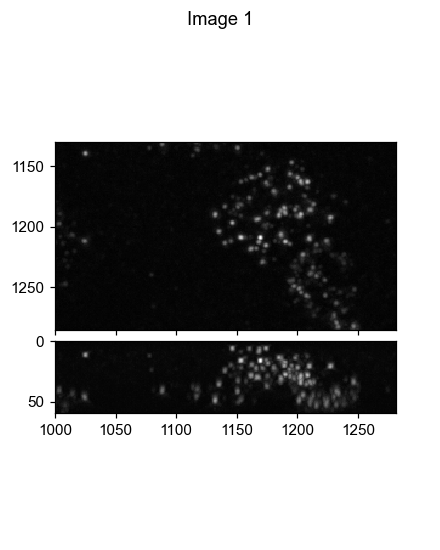

In [19]:
visual_tools.imshow_mark_3d_v2(sel_combo_ims)

## generate density by spots

In [ ]:
fov._load_from_file('combo')

In [ ]:
all_coords = np.concatenate(fov.combo_spots_list)[:,:4]

In [ ]:
single_im_size = fov.shared_parameters['single_im_size']

h = np.histogramdd(all_coords[:,1:], 
               bins=[np.arange(0,single_im_size[0]+1,1),
                     np.arange(0,single_im_size[1]+1,1),
                     np.arange(0,single_im_size[2]+1,1),], 
               weights=all_coords[:,0],
                  )[0]

In [ ]:
from scipy.ndimage.filters import maximum_filter,minimum_filter,median_filter,gaussian_filter
ft_h = gaussian_filter(h, 2)

In [ ]:
from ImageAnalysis3 import _image_size

In [ ]:
def generate_mask_from_spots(spots_list, 
                             single_image_size=_image_size,
                             gaussian_ft_size=3,
                             sel_crop=None,
                             ):

In [ ]:
visual_tools.ims

In [ ]:
visual_tools.imshow_mark_3d_v2([h, ft_h, ft_h>300])

In [ ]:
fov._load_from_file('combo')

In [ ]:
np.save(os.path.join(fov.save_folder, 'combo_channels'), fov.combo_channels, )
np.save(os.path.join(fov.save_folder, 'combo_ids'), fov.combo_ids, )

In [ ]:
fov.save_folder

## test spot decoding

In [ ]:
from ImageAnalysis3.classes import decode
reload(decode)

In [ ]:
from ImageAnalysis3.classes.preprocess import Spots3D, SpotTuple

In [ ]:
fov._load_from_file('combo')
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    #combo_ims = _grp['ims'][:]
    combo_ids = _grp['ids'][:]
    raw_combo_spots_list = [Spots3D(_spots[_spots[:,0]>0], bits=_id, pixel_sizes=fov_param['shared_parameters']['distance_zxy']) 
                            for _id, _spots in zip(combo_ids, _grp['raw_spots'][:])]

In [ ]:
# load decoder
decoder_filenames =  [os.path.join(fov.save_folder, 'Decoder', _fl) for _fl in os.listdir(os.path.join(fov.save_folder, 'Decoder')) 
 if fov.fov_name.split(os.extsep)[0] in _fl and 'Decoder.pkl' in _fl]

In [ ]:
_decoder_filename = decoder_filenames[0]
decoder = pickle.load(open(_decoder_filename, 'rb'))

In [ ]:
_g = decoder.spot_groups[100]
_bits = np.sort(_g.bits)
raw_spots = []

for _b, _spot in zip(_bits, _g.spots):
    _raw_spot_ind = np.where(np.linalg.norm(raw_combo_spots_list[np.where(fov.combo_ids == _b)[0][0]][:,4:] - _spot[4:], axis=1)<1e-5)[0]
    _raw_spot = raw_combo_spots_list[np.where(fov.combo_ids == _b)[0][0]][_raw_spot_ind]
    raw_spots.append(_raw_spot[0])

In [ ]:
_bits

In [ ]:
_ims = [combo_ims[np.where(fov.combo_ids==_b)[0][0]] for _b in _bits]

spots_imshow_dict = {'coords':[],
                     'class_ids':[],
                    }


for _i, _spot in enumerate(raw_spots):
    print(_spot)
    spots_imshow_dict['coords'].append(np.flipud(_spot[1:4]))
    spots_imshow_dict['class_ids'].append(_i)


visual_tools.imshow_mark_3d_v2(_ims, given_dic=spots_imshow_dict, image_names=_bits)

In [ ]:
_g.intensities()

In [ ]:
np.sum(np.array([len(_g.spots) for _g in decoder.spot_groups]) == 3)

In [ ]:
decoded_spots_list = [[] for _id in fov.combo_ids]
for _g in decoder.spot_groups:
    
    _bits = np.sort(_g.bits)
    raw_spots = []

    for _b, _spot in zip(_bits, _g.spots):
        _bid = np.where(fov.combo_ids == _b)[0][0]
        _raw_spot_ind = np.where(np.linalg.norm(raw_combo_spots_list[_bid][:,4:] - _spot[4:], axis=1)<1e-5)[0]
        _raw_spot = raw_combo_spots_list[_bid][_raw_spot_ind]
        decoded_spots_list[_bid].append(_raw_spot[0])
        
decoded_raw_spots_list = [Spots3D(_spots, bits=_id) for _id,_spots in zip(fov.combo_ids, decoded_spots_list)]

In [ ]:
new_decoder.valid_region_2_bits

In [ ]:
ref_metrics = decode.generate_score_metrics(_pair_list,)
ref_metrics = np.concatenate(ref_metrics, axis=0)

In [ ]:
_pair_scores,_ = decode.generate_scores(_pair_list, ref_metrics,)

In [ ]:
reload(decode)
_final_scores = decode.summarize_score(_pair_list)

In [ ]:
from tqdm import tqdm

In [ ]:
new_decoder.spot_groups = _selected_tuples

In [ ]:
plt.figure()
plt.hist(_spot_usage, bins=np.arange(10))

In [ ]:
for _g in new_de

In [ ]:

spots_imshow_dict = {'coords':[],
                     'class_ids':[],
                    }


for _i, _spots in enumerate(decoded_raw_spots_list):
    #print(len(_spots))
    spots_imshow_dict['coords'].extend(list(np.fliplr(_spots.to_coords())))
    spots_imshow_dict['class_ids'].extend(list(_i*np.ones(len(_spots),dtype=np.int32)))


visual_tools.imshow_mark_3d_v2(combo_ims, given_dic=spots_imshow_dict, image_names=fov.combo_ids)

In [ ]:
# cand spots
_cand_spot_filename = _decoder_filename.replace("Decoder", 'CandSpots')
cand_spots_dict = pickle.load(open(_cand_spot_filename, 'rb'))

In [ ]:
cand_spots_list = [[] for _id in fov.combo_ids]

for _i, _id in enumerate(fov.combo_ids):
    if _id in cand_spots_dict:
        _spots = cand_spots_dict[_id]
        for _spot in _spots:
            _raw_spot_ind = np.where(np.linalg.norm(raw_combo_spots_list[_i][:,4:] - _spot[4:], axis=1)<1e-5)[0]
            _raw_spot = raw_combo_spots_list[_i][_raw_spot_ind]
            cand_spots_list[_i].append(_raw_spot[0])
            
    
cand_raw_spots_list = [Spots3D(_spots, bits=_id) for _id,_spots in zip(fov.combo_ids, cand_spots_list)]


In [ ]:

spots_imshow_dict = {'coords':[],
                     'class_ids':[],
                    }


for _i, _spots in enumerate(cand_raw_spots_list):
    #print(len(_spots))
    spots_imshow_dict['coords'].extend(list(np.fliplr(_spots.to_coords())))
    spots_imshow_dict['class_ids'].extend(list(_i*np.ones(len(_spots),dtype=np.int32)))


visual_tools.imshow_mark_3d_v2(combo_ims, given_dic=spots_imshow_dict, image_names=fov.combo_ids)

In [ ]:
ch_2_int = {'750':0, '647':1}
id_2_channels = {_id:_ch for _id,_ch in zip(fov.combo_ids, fov.combo_channels)}

In [ ]:

# cand spots

_decoder_filename = decoder_filenames[4]
decoder = pickle.load(open(_decoder_filename, 'rb'))

_cand_spot_filename = _decoder_filename.replace("Decoder", 'CandSpots')
cand_spots_dict = pickle.load(open(_cand_spot_filename, 'rb'))

cand_spots = decode.spots_dict_to_cand_spots(_cand_spot_filename, pixel_sizes=[250,108,108])

bit_cts = np.array([np.median(_spots.to_coords(), axis=0) for _id, _spots in cand_spots_dict.items()])


In [ ]:
len(decoder.spot_groups)

In [ ]:
new_cand_spots_dict = correct_coords_by_channel_centers(cand_spots_dict, id_2_channels)

In [ ]:
import pandas as pd
codebook_filename = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\Summary_tables\CTP11-mouse-genome-1000_codebook.csv'
#
codebook_df = pd.read_csv(codebook_filename, header=0)

In [ ]:
decode.batch_decode_DNA()

In [ ]:
_cand_spot_filename

In [ ]:
cand_spots = decode.spots_dict_to_cand_spots(_cand_spot_filename, pixel_sizes=pixel_sizes, 
                                                 normalize_intensity=True, refine_chromatic=True,
                                                 id_2_channel=id_2_channels)

In [ ]:
cand_spots[0] - new_cand_spots[0]

In [ ]:
reload(decode)

pixel_sizes = [250,108,108]
_overwrite = False
pair_search_radius = 250

new_cand_spots = decode.spots_dict_to_cand_spots(new_cand_spots_dict, pixel_sizes=pixel_sizes, 
                                                 normalize_intensity=True,
                                                 id_2_channel=id_2_channels)

In [ ]:
%%time
reload(decode)
new_decoder = decode.DNA_Merfish_Decoder(codebook_df, new_cand_spots,
                              pixel_sizes=pixel_sizes, valid_score_th=-25,
                              savefile=_decoder_filename,
                              ct_dist_factor=5, local_dist_factor=0,
                              load_from_file=False,
                              )


# decode and get spot_groups
new_decoder.prepare_spot_tuples(pair_search_radius=pair_search_radius, overwrite=_overwrite)

In [ ]:
%%time
# init chr centers
chr_2_homolog_centers = new_decoder.init_homolog_centers()
# scoring
score_metrics = new_decoder.calculate_score_metrics()
chr_2_scores = new_decoder.calculate_scores(score_metrics)

In [ ]:
%matplotlib inline
new_decoder.iterative_assign_spot_groups_2_homologs()

In [ ]:
%matplotlib notebook
figure_zxys_list, figure_labels, figure_label_ids = new_decoder.summarize_zxys_all_chromosomes()

# distmap
#distmap_filename = new_decoder_filename.replace('new_decoder.pkl', 'AllDistmap.png')
_ax = new_decoder.summarize_to_distmap(new_decoder, color_limits=[0,5])#, save_filename=distmap_filename) 

In [ ]:
_vs = decode.summarize_score(new_decoder.chr_2_valid_scores['1'], new_decoder.metric_weights)
_ivs = decode.summarize_score(new_decoder.chr_2_invalid_scores['1'], new_decoder.metric_weights)

In [ ]:
from scipy.stats import scoreatpercentile
plt.figure()
plt.hist(_vs, bins=np.arange(-20,1,0.5), density=True, alpha=0.5)
plt.hist(_ivs, bins=np.arange(-20,1,0.5), density=True, alpha=0.5)
plt.show()

In [ ]:
print(np.median(np.diag(squareform(pdist(np.concatenate(new_decoder.final_zxys_list))),1)))
plt.figure()
plt.hist(np.diag(squareform(pdist(np.concatenate(new_decoder.final_zxys_list))),1), bins=np.arange(0,8,0.4))
plt.show()

In [ ]:
%matplotlib notebook
figure_zxys_list, figure_labels, figure_label_ids = new_decoder.summarize_zxys_all_chromosomes()

# distmap
#distmap_filename = new_decoder_filename.replace('new_decoder.pkl', 'AllDistmap.png')
_ax = new_decoder.summarize_to_distmap(new_decoder, color_limits=[0,5])#, save_filename=distmap_filename) 

In [ ]:
%matplotlib inline
_overwrite = True
self_scores = new_decoder.calculate_self_scores(make_plots=True, overwrite=_overwrite)

In [ ]:
len(new_decoder.spot_groups)

In [ ]:
chrs_2_init_centers = new_decoder.init_homolog_assignment(min_cand_number=10, overwrite=_overwrite)

In [ ]:
%matplotlib inline
chr_2_assigned_tuple_list, chr_2_zxys_list, chr_2_chr_centers= \
    new_decoder.finish_homolog_assignment(plot_stats=True, overwrite=_overwrite, verbose=True)

In [ ]:
%matplotlib notebook
figure_zxys_list, figure_labels, figure_label_ids = new_decoder.summarize_zxys_all_chromosomes()

# distmap
#distmap_filename = new_decoder_filename.replace('new_decoder.pkl', 'AllDistmap.png')
_ax = new_decoder.summarize_to_distmap(new_decoder, color_limits=[0,5])#, save_filename=distmap_filename) 

In [ ]:
new_decoder

In [ ]:
%matplotlib notebook
figure_zxys_list, figure_labels, figure_label_ids = decoder.summarize_zxys_all_chromosomes()

# distmap
#distmap_filename = decoder_filename.replace('decoder.pkl', 'AllDistmap.png')
_ax = decoder.summarize_to_distmap(decoder, color_limits=[0,5])#, save_filename=distmap_filename) 

In [ ]:
from scipy.spatial.distance import pdist, squareform

In [ ]:
np.median(np.diag(squareform(pdist(np.concatenate(new_decoder.final_zxys_list))),1))

In [ ]:
np.median(np.diag(squareform(pdist(np.concatenate(new_decoder.final_zxys_list))),1))
plt.figure()
plt.hist(np.diag(squareform(pdist(np.concatenate(new_decoder.final_zxys_list))),1), bins=np.arange(0,8,0.4))
plt.show()

In [ ]:
np.median(np.diag(squareform(pdist(np.concatenate(decoder.final_zxys_list))),1))

In [ ]:
plt.figure()
plt.hist(np.diag(squareform(pdist(np.concatenate(decoder.final_zxys_list))),1), bins=np.arange(0,8,0.4))
plt.show()

In [ ]:
combo_ims

In [ ]:
decoded_spots_list = [[] for _id in fov.combo_ids]
for _g in new_decoder.spot_groups:
    
    _bits = _g.bits
    raw_spots = []

    for _b, _spot in zip(_bits, _g.spots):
        _bid = np.where(fov.combo_ids == _b)[0][0]
        _raw_spot_ind = np.where(np.linalg.norm(raw_combo_spots_list[_bid][:,4:] - _spot[4:], axis=1)<1e-5)[0]
        _raw_spot = raw_combo_spots_list[_bid][_raw_spot_ind]
        if len(_raw_spot) == 0:
            print(_b)
        decoded_spots_list[_bid].append(_raw_spot[0])
        
decoded_raw_spots_list = [Spots3D(_spots, bits=_id) for _id,_spots in zip(fov.combo_ids, decoded_spots_list)]


spots_imshow_dict = {'coords':[],
                     'class_ids':[],
                    }


for _i, _spots in enumerate(decoded_raw_spots_list):
    #print(len(_spots))
    spots_imshow_dict['coords'].extend(list(np.fliplr(_spots.to_coords())))
    spots_imshow_dict['class_ids'].extend(list(_i*np.ones(len(_spots),dtype=np.int32)))


visual_tools.imshow_mark_3d_v2(combo_ims, given_dic=spots_imshow_dict, image_names=fov.combo_ids)

In [ ]:
_chr_name = '15'
%matplotlib notebook
def rotate(angle):
     ax.view_init(azim=angle)
        
from matplotlib import animation

from matplotlib.cm import Reds, Blues, Spectral
fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d')

_zxys_list = new_decoder.chr_2_zxys_list[_chr_name]
_centers = new_decoder.chr_2_homolog_centers[_chr_name]

for _ichr, _zxys in enumerate(_zxys_list):
    
    ax.scatter(_zxys[:,1], _zxys[:,2], _zxys[:,0],
               cmap=Spectral, 
               c=Spectral(_ichr/(len(_zxys_list)+1)),
               #c=homolog_labels,
               alpha=0.7,
               s=3)

    ax.plot(_zxys[:,1], _zxys[:,2], _zxys[:,0], linewidth=0.5,
            alpha=0.7,
            color = Spectral( _ichr/(len(_zxys_list)+1) ) )

ax.scatter(_centers[:,1], _centers[:,2], _centers[:,0],
           color=[0,0,0],
           s=30)
ax.set_title(f"chr:{_chr_name}")
plt.show()

angle = 3
figure_folder = r'\\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Figures'
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=50)
ani.save(os.path.join(figure_folder, 
                      os.path.basename(_decoder_filename).replace('Decoder.pkl', f'Decoded_{_chr_name}.gif')), 
         writer=animation.PillowWriter(fps=30))

In [ ]:
%matplotlib notebook
def rotate(angle):
     ax.view_init(azim=angle)
        
from matplotlib import animation

from matplotlib.cm import Reds, Blues, Spectral
fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d')

_zxys_list = decoder.chr_2_zxys_list['1']

for _ichr, _zxys in enumerate(_zxys_list):
    
    ax.scatter(_zxys[:,1], _zxys[:,2], _zxys[:,0],
               cmap=Spectral, 
               c=Spectral(_ichr/(len(_zxys_list)+1)),
               #c=homolog_labels,
               alpha=0.7,
               s=3)

    ax.plot(_zxys[:,1], _zxys[:,2], _zxys[:,0], linewidth=0.5,
            alpha=0.7,
            color = Spectral( _ichr/(len(_zxys_list)+1) ) )
    
plt.show()

In [ ]:

#_chr_name = '1'

metric_names = ['int. mean', 'int. CV', 'inner dist median', 'local dist mean', 'homolog dist']
valid_metrics_list = collect_metrics(decoder.chr_2_groups[_chr_name])
valid_scores_list = decoder.chr_2_valid_scores[_chr_name]

invalid_metrics_list = collect_metrics(decoder.chr_2_invalid_groups[_chr_name])
invalid_scores_list = decoder.chr_2_invalid_scores[_chr_name]



num_score_metrics = len(valid_scores_list.transpose())
cmap = cm.Spectral

fig, axes_list = plt.subplots(2,num_score_metrics, figsize=(num_score_metrics*2, 4), dpi=150)
for _iax, _ax in enumerate(axes_list[0]):
    _ax.scatter(np.array(valid_metrics_list).transpose()[_iax], 
                valid_scores_list.transpose()[_iax], 
                s=1, color=cm.autumn(_iax / num_score_metrics),
                label='valid')
axes_list[0][0].set_ylabel("Valid", fontsize=7.5)
for _iax, _ax in enumerate(axes_list[1]):

    _ax.scatter(np.array(invalid_metrics_list).transpose()[_iax], 
                invalid_scores_list.transpose()[_iax], 
                s=1, color=cm.winter(_iax / num_score_metrics),
                label='invalid')
    _ax.set_xlabel(metric_names[_iax], fontsize=7.5)
axes_list[1][0].set_ylabel("Invalid", fontsize=7.5)

fig.subplots_adjust(wspace=0.3)
fig.show()


In [ ]:
bit_cts = np.array([np.median(_spots.to_coords(), axis=0) for _id, _spots in new_cand_spots_dict.items()])
from matplotlib.cm import Reds, Blues, Spectral
fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d',)

_zxys = np.array(bit_cts)

_pf = ax.scatter(_zxys[:,1], _zxys[:,2], _zxys[:,0],
           cmap='bwr', 
           #c=homolog_score_list[_ichr],
           c=[ch_2_int[_ch] for _ch in fov.combo_channels],
           depthshade=True,
                 #vmax=0, vmin=-8,
           alpha=1,
           s=3)

#ax.plot(_zxys[:,1], _zxys[:,2], _zxys[:,0], linewidth=0.5, alpha=0.7,)

plt.colorbar(_pf)
fig.show()

In [ ]:
from matplotlib.cm import Reds, Blues, Spectral
fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d',)

_zxys = np.array(bit_cts)

_pf = ax.scatter(_zxys[:,1], _zxys[:,2], _zxys[:,0],
           cmap='bwr', 
           #c=homolog_score_list[_ichr],
           c=[ch_2_int[_ch] for _ch in fov.combo_channels],
           depthshade=True,
                 #vmax=0, vmin=-8,
           alpha=1,
           s=3)

#ax.plot(_zxys[:,1], _zxys[:,2], _zxys[:,0], linewidth=0.5, alpha=0.7,)

plt.colorbar(_pf)
fig.show()

In [ ]:


from matplotlib.cm import Reds, Blues, Spectral
fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d',)

_zxys = cand_spots.to_coords()

_pf = ax.scatter(_zxys[:,1], _zxys[:,2], _zxys[:,0],
           cmap='bwr', 
           #c=homolog_score_list[_ichr],
           c=cand_spots.bits,
           depthshade=True,
                 #vmax=0, vmin=-8,
           alpha=1,
           s=1)
plt.colorbar(_pf)
fig.show()

In [ ]:
# test batch
reload(decode)

In [ ]:
_decoder_filename = _cand_spot_filename.replace('CandSpots','NewDecoder')

In [ ]:
_args = (_cand_spot_filename, codebook_df, _decoder_filename, True, True, id_2_channels,
         pixel_sizes, 2, 0.5, pair_search_radius, np.array([1,1,1,1,1]))

decode.batch_decode_BB_like(*_args)